#### Install and Import Dependencies

In [13]:
from matplotlib import pyplot as plt
import cv2
import torch
import numpy as np
import torchvision

#### Load Model

In [14]:
# Model - loding preTrained Model from pytorchHub
model = torch.hub.load("ultralytics/yolov5", "yolov5s")

Using cache found in C:\Users\joela/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-5-21 Python-3.8.16 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [5]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

###  Make Detections with Images

In [6]:
img = 'https://th.bing.com/th/id/OIP.Kc_DhTQi-VEY4QHPc0Bw-wHaE8?pid=ImgDet&rs=1'

image 1/1: 316x474 6 persons
Speed: 750.4ms pre-process, 240.5ms inference, 0.0ms NMS per image at shape (1, 3, 448, 640)


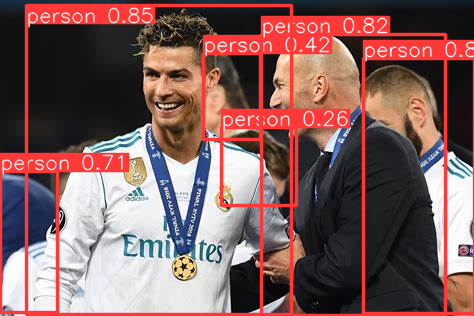

In [9]:
results = model(img)
results.print()
results.show()

In [19]:
img2 = 'https://c.pxhere.com/photos/10/ab/highway_travel_ride_reindeer_autos_traffic_vehicles_motor_vehicles_multi_track-1393510.jpg!d'

In [21]:
result2 = model(img2)
result2.print()

image 1/1: 1214x1200 22 cars, 1 truck
Speed: 798.3ms pre-process, 299.4ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


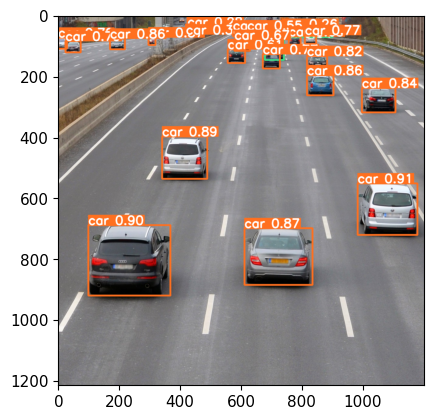

In [24]:
%matplotlib inline 
plt.imshow(np.squeeze(result2.render()))
plt.show()

### Real Time Detections

In [62]:
# Open the default camera (index 0) for capturing video
cap1 = cv2.VideoCapture(0)

# Loop until the camera is open
while cap1.isOpened():
    # Read the current frame from the camera
    ret, frame = cap1.read()
    
     # make detections using pre-Trained model
    vidRes = model(frame)
    
    # Display the frame in a window named 'YOLO'
    cv2.imshow('YOLO', np.squeeze(vidRes.render()))
    
    
    # If the 'q' key is pressed, exit the loop
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release the camera and close all windows
cap1.release()
cv2.destroyAllWindows()


### Train from scratch

In [16]:
import uuid #unique identifier
import os
import time

In [65]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
number_imgs = 20 #20 for each labels

In [37]:
os.listdir('data') #Confirming

['images']


### Load Custom Model

In [56]:
for label in labels:
    print('Collecting images: {}'.format(label))

    for img in range(num_images):
        print("Collecting images for {}, image number{}".format(label, img+1))
        
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)

data\images\awake.bab24db1-f7aa-11ed-972d-9c2f9d6122a8.jpg
data\images\awake.bab2e46b-f7aa-11ed-a096-9c2f9d6122a8.jpg
data\images\awake.bab2e46c-f7aa-11ed-a55d-9c2f9d6122a8.jpg
data\images\awake.bab2e46d-f7aa-11ed-89ef-9c2f9d6122a8.jpg
data\images\awake.bab2e46e-f7aa-11ed-8660-9c2f9d6122a8.jpg
data\images\awake.bab2e46f-f7aa-11ed-9a5f-9c2f9d6122a8.jpg
data\images\awake.bab2e470-f7aa-11ed-8e7e-9c2f9d6122a8.jpg
data\images\awake.bab2e471-f7aa-11ed-a4a6-9c2f9d6122a8.jpg
data\images\awake.bab2e472-f7aa-11ed-aa69-9c2f9d6122a8.jpg
data\images\awake.bab2e473-f7aa-11ed-99d5-9c2f9d6122a8.jpg
data\images\awake.bab2e474-f7aa-11ed-95ac-9c2f9d6122a8.jpg
data\images\awake.bab2e475-f7aa-11ed-9518-9c2f9d6122a8.jpg
data\images\awake.bab2e476-f7aa-11ed-b23f-9c2f9d6122a8.jpg
data\images\awake.bab2e477-f7aa-11ed-9f25-9c2f9d6122a8.jpg
data\images\awake.bab2e478-f7aa-11ed-b6d7-9c2f9d6122a8.jpg
data\images\awake.bab2e479-f7aa-11ed-9e50-9c2f9d6122a8.jpg
data\images\awake.bab2e47a-f7aa-11ed-8c26-9c2f9d6122a8.j

In [61]:
os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg')

'data\\images\\awake.254d068f-f7ab-11ed-8ad4-9c2f9d6122a8.jpg'

In [66]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num+1))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

# # Open the default camera (index 0) for capturing video
# cap = cv2.VideoCapture(0)

# # Loop through each label in the labels list
# for label in labels:
#     print('Collecting images: {}'.format(label))
#     time.sleep(5)
    
#     # Loop through the desired number of images
#     for img in range(num_images):
#         print("Collecting images for {}, image number{}".format(label, img+1))
        
#         # Read a frame from the webcam
#         ret, frame = cap.read()
        
#         # Naming the image file path using the UUID package
#         imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
#         # Save the frame as an image file
#         cv2.imwrite(imgname, frame)
        
#         # Display the captured frame in a window named 'Image Collection'
#         cv2.imshow('Image Collection', frame)
        
#         # Delay for 2 seconds before capturing the next image
#         time.sleep(2)
        
#         # If the 'q' key is pressed, exit the loop
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break
    
#     # Release the camera
#     cap.release()
    
# # Close all windows
# cv2.destroyAllWindows()


In [91]:
#Just plotting and checking
import random
def data_plot():
    # Directory path containing the images
    images_dir = 'data/images'

    # Get a list of image files in the directory
    image_files = [os.path.join(images_dir, file) for file in os.listdir(images_dir) if file.endswith('.jpg')]

    # Shuffle the image files
    random.shuffle(image_files)

    # Create a subplot grid for displaying multiple images
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

    # Iterate over the shuffled image files and display them
    for i, ax in enumerate(axes.flatten()):
        # Read the image file using OpenCV
        image = cv2.imread(image_files[i])
        
        # Convert BGR image to RGB (for correct color display)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Display the image on the subplot
        ax.imshow(image)
        ax.axis('off')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()


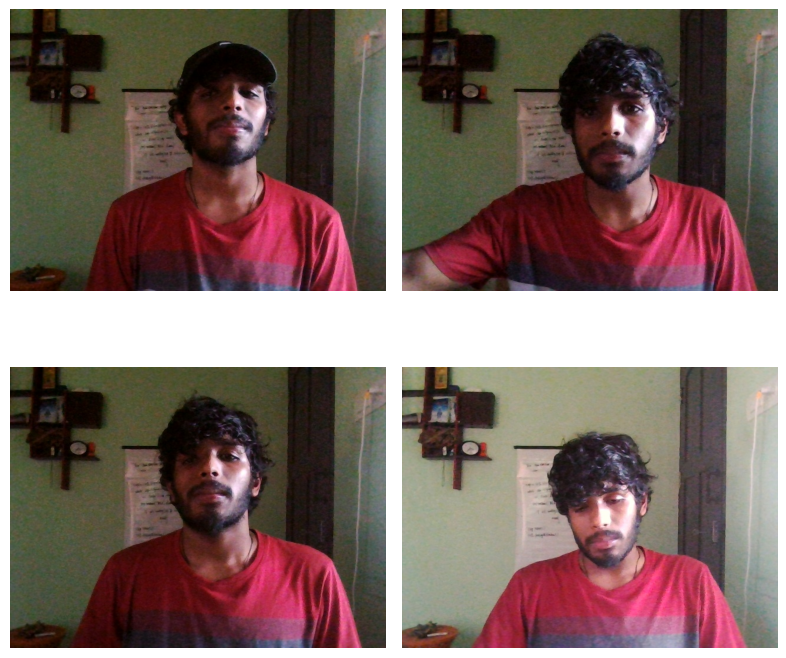

In [85]:
data_plot()

In [ ]:
# %pip install pyqt5 lxml --upgrade
# %cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [15]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

### Load Model

In [19]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt')

Using cache found in C:\Users\joela/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-5-21 Python-3.8.16 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [35]:
#Test with image
test_img = os.path.join('data', 'images', 'drowsy.22886599-f7b0-11ed-aa86-9c2f9d6122a8.jpg')

In [36]:
result = model(test_img)
print(result)

image 1/1: 480x640 1 drowsy
Speed: 48.9ms pre-process, 209.4ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


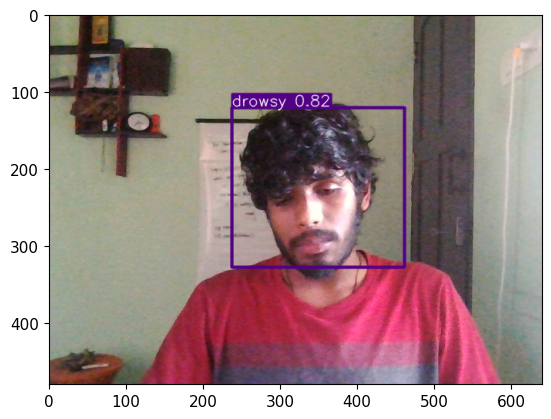

In [41]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

In [56]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    res, frame = cap.read()
    
    # Make detections
    detections = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(detections.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()


To load the custom YOLOv5 model in a different project, follow these steps:

1. Make sure you have the necessary dependencies installed in your new project. Install PyTorch and TorchVision if they are not already installed. You can use `pip` or `conda` to install the required packages. For example:

   ```
   pip install torch torchvision
   ```

2. Copy the `custom_model.pt` file (or the file containing your custom model's weights) to your new project directory.

3. In your new project, import the required libraries:

   ```python
   import torch
   import torchvision
   import torch.hub
   ```

4. Load the custom YOLOv5 model using the `torch.hub.load()` function:

   ```python
   model = torch.hub.load('ultralytics/yolov5', 'custom', path='custom_model.pt')
   ```

   Here, `'custom'` is the YOLOv5 model variant you are using (e.g., `'yolov5s'`, `'yolov5m'`, `'yolov5l'`, `'yolov5x'`), and `'custom_model.pt'` is the path to your custom model's weights.

5. Once the model is loaded, you can use its methods for inference or other tasks. For example, you can use `model.predict()` to make predictions on new images or `model.forward()` to get the raw outputs of the model.

Make sure that the file paths and model variants are correctly specified according to your project's structure and the specific YOLOv5 model you are using.
